# In-Class Coding Lab: Data Visualization

The goals of this lab are to help you understand:

 - The value of visualization: A picture is worth 1,000 words!
 - The various ways to visualize information
 - The basic requirements for any visualization
 - How to plot complex visualizations such as multi-series charts and maps
 - Visualization Tools:
     - Matplolib
     - Plot.ly
     - Folium Maps
     

In [30]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import plotly 
import plotly.plotly as py     
import plotly.graph_objs as go  
import cufflinks as cf
import pandas as pd
import folium
import warnings
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # larger figure size
warnings.filterwarnings('ignore')

## Back to the movie goers data set

For this lab, we will once again use the movie goers dataset. As you may recall this data set is a survey demographic survey of people who go to the movies. Let's reload the data and setup our `age_group` feature again.

In [3]:
goers = pd.read_csv('CCL-moviegoers.csv')
goers['age_group'] = ''
goers['age_group'][goers['age'] <=18] = 'Youth'
goers['age_group'][(goers['age'] >=19) & (goers['age'] <=55)] = 'Adult'
goers['age_group'][goers['age'] >=56] = 'Senior'

goers.sample(5)

,user_id,age,gender,occupation,zip_code,age_group
130,131,59,F,administrator,15237,Senior
411,412,25,M,educator,15222,Adult
341,342,25,F,other,98006,Adult
414,415,39,M,educator,85711,Adult
915,916,27,M,engineer,N2L5N,Adult


## Visualizing Data

There are many ways your can visualize information. Which one is the most appropriate? It depends on the data, of course. 

- **Counting Categorial data** belongs in *charts like pie charts and bar charts*.
- **Counting Numerical data** is best suited for *histograms*.
- **Timeseries data and continuous data** belongs in *line charts*.
- **A comparision of two continuous values** is best suited for a *scatter plot*. 
- **Geographical data** is best displauyed on *maps*.

Let's use this knowledge to plot some data in the `goers` `DataFrame`!

## Males or Females?

The first think we might want to visualize is a count gender in the dataset. A **pie** chart is well suited for this task as it displays data as a portion of a whole. To create a pie chart we need the data to count and the labels for the counts.

Let's try it.

First we get the value counts as a series `gender`:

In [4]:
gender = goers['gender'].value_counts()
gender

M    670
F    273
Name: gender, dtype: int64

Then we make it into a dataframe:

In [5]:
gender_df = pd.DataFrame( { 'Gender' : gender.index,  "Counts" : gender })
gender_df

,Counts,Gender
M,670,M
F,273,F


Then we plot! The index has the labels, and the value at the index is what we want to plot:

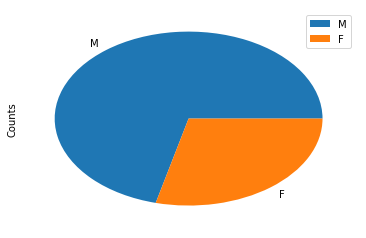

In [6]:
gender_df.plot.pie( y = 'Counts') # y are the values we are plotting

### Now You Try it!

Create a pie chart based on `age_group` first create a series of the `value_counts()` second, create the `DataFrame` with two columns `AgeGroup` and `Counts` then plot with `.plot.pie()`. 

Follow the steps we did in the previous three cells, but comvine into one cell!

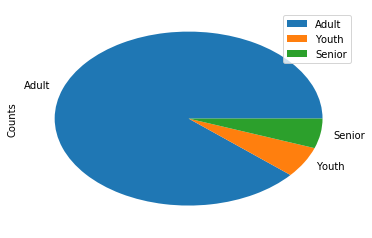

In [9]:
#todo write code here
groups = goers ['age_group'].value_counts()
groups
groups_df = pd.DataFrame ( {'Age Group' : groups. index, "Counts" : groups })
groups_df
groups_df.plot.pie(y = "Counts")

## Too many pieces of the pie?

Pie charts are nice, but they are only useful when you have a small number of labels. More that 5-7 labels and the pie becomes messy. For example take a look at this pie chart of `occupation`:

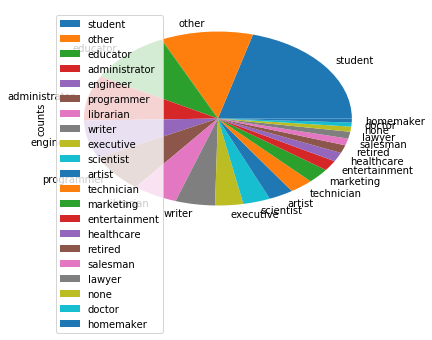

In [10]:
occ = goers['occupation'].value_counts()
occ_df = pd.DataFrame( { 'occupation' : occ.index,  "counts" : occ })
occ_df.plot.pie(y = 'counts')


That's crazy... and difficult to comprehend. Also pie charts visualize data as part of the whole. We have no idea how many students there are. Sometimes we want to know actual counts. This is where the **bar chart** comes in handy!

## Raising the bar!

Let's reproduce the same plot as a bar:

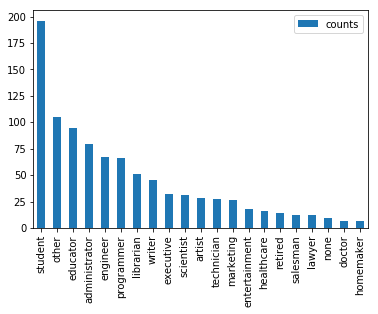

In [11]:
occ_df.plot.bar()

Ahh. that's much better. So much easier to understand!

### Now you try it!

Write a one-liner to plot `groups_df` as a Bar!

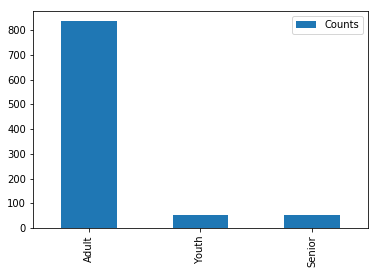

In [12]:
# todo write code here
groups_df.plot.bar()

## When bar charts fail... 

Bar charts have the same problem as pie charts. Too many categories overcomplicate the chart, or show the data in a meaningless way. For example, let's create a bart chart for ages: 

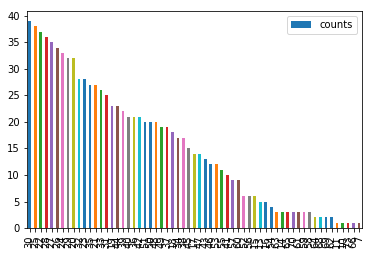

In [13]:
ages = goers['age'].value_counts()
ages_df = pd.DataFrame( { 'age' : ages.index,  "counts" : ages })
ages_df.plot.bar(y = 'counts')

Meaningless. For two key reasons:

1. too many categories
2. age is a continuous variable not a categorical variable. In plain English, this means there's a relationship between one age and the next.  20 < 21 < 22. This is not represented in a bar chart.

## ...Call in the Histogram!

What we want is a **historgram**, which takes a continuous variable and loads counts into "buckets".  Notice how we didn't have to lump data with `value_counts()`. Histograms can do that automatically because the `age` variable is continuous. Let's try it:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FDAAA6BF98>]], dtype=object)

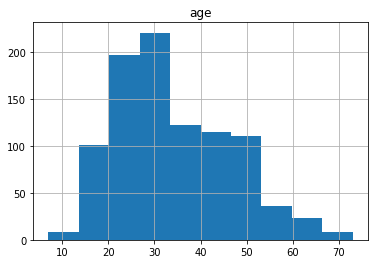

In [14]:
goers.hist(column ='age')

## Plot.ly

[Plot.ly](https://plot.ly) is data visualization as a service. You give it data, it gives you back a web-based plot. Plot.ly is free and works with a variety of environments and programming languages, including Python. 

For Python is has bindings so that you can use it just like `matplotlib`! No need to manually invoke the web service call.

To get started with plot.ly you must sign up for an account and get a set of credentials:

- Visit [https://plot.ly/settings/api](https://plot.ly/settings/api)
- Create an account or sign-in with Google or GitHub
- Generate your API key and paste your username and key in the code below:

In [28]:
# todo: setup the credentials replace ??? and ??? with your Plot.ly username and api_key
plotly.tools.set_credentials_file(username='pelzcarol1', api_key='A8B2aOLODGf6kk82K5ZU')

Using plot.ly is as easy as, or sometimes easier than `matplotlib`. In most cases all you need to do is call `iplot()` on the data frame. For example, here's out first pie chart, plotly style:

In [29]:
gender_df.iplot(kind="pie", labels = 'Gender', values='Counts') 

Notice that plot.ly is a bit more interactive. You can hover over the part of the pie chart and see counts!

### Now You Try it!

Use plotly's `iplot()` method to create a bar chart on the `occ_df` Data Frame:


In [21]:
# todo: write code here
occ_df.iplot(kind = "bar", labels = "occupation", values = "counts")

## Folium with Leaflet.js

Folium is a Python module wrapper for [Leaflet.js](http://leafletjs.com/), which uses [Open Street Maps](https://www.openstreetmap.us/). These are two, popular open source mapping libraries. Unlike Google maps API, its 100% free!

You can use Folium to render maps in Python and put data on the maps. Here's how easy it is to bring up a map:


In [ ]:
CENTER_US = (39.8333333,-98.585522)
london = (51.5074, -0.1278)
map = folium.Map(location=CENTER_US, zoom_start=4)
map

You can zoom right down to the street level and get a amazing detail. There's also different maps you can use, as was covered in this week's reading. 

## Mapping the students.

Let's take the largest category of movie goers and map their whereabouts. We will first need to import a data set to give us a lat/lng for the `zip_code` we have in the dataframe. We could look this up with Google's geolookup API, but that's too slow as we will be making 100's of requests. It's better to have them stored already and merge them with `goers`!

Let's import the zipcode database into a Pandas DataFrame, then merge it with the `goers` DataFrame:

In [22]:
zipcodes = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/zipcodes/free-zipcode-database-Primary.csv', dtype = {'Zipcode' :object})
data = goers.merge(zipcodes,  how ='inner', left_on='zip_code', right_on='Zipcode')
students = data[ data['occupation'] == 'student']
students.sample()

,user_id,age,gender,occupation,zip_code,age_group,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
72,274,20,F,student,55414,Adult,55414,STANDARD,MINNEAPOLIS,MN,PRIMARY,44.96,-93.26,NA-US-MN-MINNEAPOLIS,False,8123.0,10417.0,254779786.0


Let's explain the code, as a Pandas refresher course:

1. in the first line I added `dtype = {'Zipcode' :object}` to force the `Zipcode` column to be of type `object` without that, it imports as type `int` and cannot match with the `goers` DataFrame.
1. the next line merges the two dataframes together where the `zip_code` in `doers` (on_left) matches `Zipcode` in `zipcodes` (on_right)
1. the result `data` is a combined DataFrame, which we then filter to only `student` occupations, sorting that in the `students` DataFrame


## Slapping those students on a map!

We're ready to place the students on a map. It's easy:

1. For each row in the students dataframe:
1.   get the coordinates (lat /lng )
1.   make a `marker` with the coordinates
1.   add the marker to the map with `add_children()`

Here we go!


In [27]:
for row in students.to_records():
    pos = (row['Lat'],row['Long'])
    message = "%d year old %s from %s, %s" % (row['age'],row['gender'], row['City'], row['State'])
    marker = folium.Marker(location=pos, 
                    popup=message
                          )
    map.add_children(marker)
map

### Now you try it!


1. use the `data` DataFrame to retrieve only the occupation `programmer`
1. create another map `map2` plot the programmers on that map!

In [26]:
## todo write code here!
CENTER_US = (39.8333333, -98.585522)
map = folium.Map(location = CENTER_US, zoom_start=4)
map2 = map
programmers = data[ data['occupation'] == 'programmer']
for row in programmers.to_records():
    pos = (row['Lat'], row["Long"])
    message = "%d year old %s from %s, %s" % (row['age'],row['gender'], row['City'], row['State'])
    marker = folium.Marker(location=pos, popup=message)
    map2.add_children(marker)
map2